In [26]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [27]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as com
import random

colour = ["black","silver","gray","white","maroon","red","purple","fuchsia","green","lime","olive","yellow","navy","blue","teal","aqua","aliceblue","antiquewhite","aqua","aquamarine","azure","beige","bisque","black","blanchedalmond","blue","blueviolet","brown","burlywood","cadetblue","chartreuse","chocolate","coral","cornflowerblue","cornsilk","crimson","cyan","darkblue","darkcyan","darkgoldenrod","darkgray","darkgreen","darkgrey","darkkhaki","darkmagenta","darkolivegreen","darkorange","darkorchid","darkred","darksalmon","darkseagreen","darkslateblue","darkslategray","darkslategrey","darkturquoise","darkviolet","deeppink","deepskyblue","dimgray","dimgrey","dodgerblue","firebrick","floralwhite","forestgreen","fuchsia","gainsboro","ghostwhite","gold","goldenrod","gray","green","greenyellow","grey","honeydew","hotpink","indianred","indigo","ivory","khaki","lavender","lavenderblush","lawngreen","lemonchiffon","lightblue","lightcoral","lightcyan","lightgoldenrodyellow","lightgray","lightgreen","lightgrey","lightpink","lightsalmon","lightseagreen","lightskyblue","lightslategray","lightslategrey","lightsteelblue","lightyellow","lime","limegreen","linen","magenta","maroon","mediumaquamarine","mediumblue","mediumorchid","mediumpurple","mediumseagreen","mediumslateblue","mediumspringgreen","mediumturquoise","mediumvioletred","midnightblue","mintcream","mistyrose","moccasin","navajowhite","navy","oldlace","olive","olivedrab","orange","orangered","orchid","palegoldenrod","palegreen","paleturquoise","palevioletred","papayawhip","peachpuff","peru","pink","plum","powderblue","purple","red","rosybrown","royalblue","saddlebrown","salmon","sandybrown","seagreen","seashell","sienna","silver","skyblue","slateblue","slategray","slategrey","snow","springgreen","steelblue","tan","teal","thistle","tomato","turquoise","violet","wheat","white","whitesmoke","yellow","yellowgreen"]
random.shuffle(colour)

In [28]:
### Load Graphs
data_base_path = "Data/"
data_rnd_base_path = "Data Random/"

G_karate = nx.read_gml(data_base_path + "graph_karate.gml")
G_karate_rnd = nx.algorithms.smallworld.random_reference(G_karate)
G_dolphins = nx.read_gml(data_base_path + "graph_dolphins.gml")
G_dolphins_rnd = nx.read_gml(data_rnd_base_path + "graph_dolphins_random.gml")
G_facebook = nx.read_gml(data_base_path + "graph_facebook.gml")
G_facebook_rnd = nx.read_gml(data_rnd_base_path + "graph_facebook_random.gml")

In [29]:
def find_community_gm(G):
    colour_map = []
    gm = com.greedy_modularity_communities(G)
    for node in G.nodes():
        for i in range(0, len(gm)):
            if node in gm[i]:
                colour_map.append(colour[i])

    nx.draw(G, node_color = colour_map, node_size=70)
    return len(gm)

In [30]:
def find_community_lp(G):
    colour_map = []
    lp = com.label_propagation_communities(G)
    for node in G.nodes():
        for i in range(0, len(lp)):
            if node in list(lp)[i]:
                colour_map.append(colour[i])

    nx.draw(G, node_color = colour_map, node_size=70)
    return len(lp)

In [31]:
def compare_communities(G, G_rnd):
    plt.figure(1)
    G_gm = find_community_gm(G)
    plt.figure(2)
    G_rnd_gm = find_community_gm(G_rnd)

    plt.figure(3)
    G_lp = find_community_lp(G)
    plt.figure(4)
    G_rnd_lp = find_community_lp(G_rnd)


    print("Number of communities by using greedy modularity maximization before randomisation:", G_gm)
    print("Number of communities by using greedy modularity maximization after randomisation:", G_rnd_gm)
    print("Number of communities by using label propagation algorithm before randomisation:", G_lp)
    print("Number of communities by using label propagation algorithm after randomisation:", G_rnd_lp)


In [32]:
figure_index = 10
def new_fig():
    global figure_index
    plt.figure(figure_index)
    figure_index+=1

In [33]:
## A 4.02
## Task 1
def visualize_ER_graph(avg_k, n_nodes):
    p = np.true_divide(avg_k, n_nodes)
    G_erg=nx.generators.random_graphs.erdos_renyi_graph(n_nodes, p)
    nx.draw(G_erg, pos=nx.spring_layout(G_erg, scale=2),node_size=10)

In [34]:
### A4.02 Task 2
def calculate_ER(N, p):
    temp_NG_N = []
    temp_avg_clustering = []
    for count in range(0,100):
        G_ER = nx.generators.random_graphs.erdos_renyi_graph(N, p)
        largest_nodes = max(nx.connected_components(G_ER), key=len)
        largest_length = len(largest_nodes)
        G_ER_c = nx.clustering(G_ER)
        clustering = [G_ER_c[n] for n in G_ER]
        temp_avg_clustering.append(np.mean(clustering))
        temp_NG_N.append( np.true_divide(largest_length, N))
    # N_g / N , avg_clustering
    return np.mean(temp_NG_N),np.mean(temp_avg_clustering)
def plot_p_NG_N(N):
    x_p = []
    y_NG_N = []
    y_avg_clustering = []
    for i in np.arange(1, 30, 1):
        p = i/N
        x_p.append(p)
        temp_ng_n, temp_avg_clustering= calculate_ER(N,p)
        y_NG_N.append(temp_ng_n)
        y_avg_clustering.append(temp_avg_clustering)
    for i in np.arange(30, N+1, 3.5):
        p = i/N
        x_p.append(p)
        temp_ng_n, temp_avg_clustering= calculate_ER(N,p)
        y_NG_N.append(temp_ng_n)
        y_avg_clustering.append(temp_avg_clustering)
    new_fig()
    plt.title("p - Ng/N")
    plt.xscale("log")
    plt.axvline(x=1/N, color='r')
    plt.plot(x_p, y_NG_N)

    plt.show()

    new_fig()
    plt.title("p - avg clustering")
    plt.plot(x_p, y_avg_clustering)
    plt.show()

In [43]:
#A04.03 - 1,-2
def generate_ws():
    y_avg_clustering = []
    x_p = []
    y_p = []
    analytical_result = []
    D_p = []
    avg_shortest_path = []


    for i in range(0, 101):
        p = i/100
        x_p.append(p)

        G_sm = nx.watts_strogatz_graph(100, 10, p)
        clustering = [nx.clustering(G_sm)[n] for n in G_sm.nodes()]
        y_avg_clustering.append(np.mean(clustering))
        y_p.append(np.true_divide(y_avg_clustering[i], y_avg_clustering[0]))
        analytical_result.append((3/2)*((5-1)/(2*5-1)*(1-p)**3) / y_avg_clustering[0])
        D_p.append(nx.average_shortest_path_length(G_sm))
        avg_shortest_path.append(D_p[i] / D_p[0])

    plt.figure(1)
    plt.title("average clustering <C(p)>/<C(0)>")
    # plt.xscale("log")
    plt.plot(x_p[1:], y_p[1:], '-b', label = '<C(p)>/<C(0)>')
    plt.plot(x_p, analytical_result, '-r', label = 'analytical_result')

    plt.figure(2)
    plt.title("average shortest-path length D(p)/D(0)")
    plt.xscale("log")
    plt.plot(x_p[1:], avg_shortest_path[1:], '-g', label = 'avg_shortest_path')

### Output Preview

#### A04.1

##### Karate

Number of communities by using greedy modularity maximization before randomisation: 3
Number of communities by using greedy modularity maximization after randomisation: 5
Number of communities by using label propagation algorithm before randomisation: 3
Number of communities by using label propagation algorithm after randomisation: 2


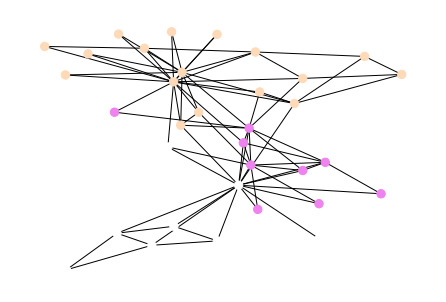

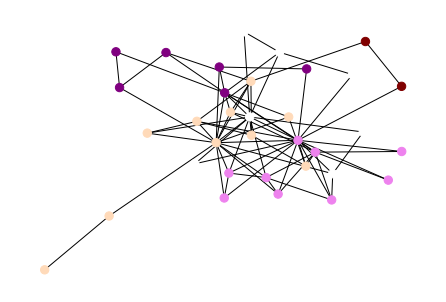

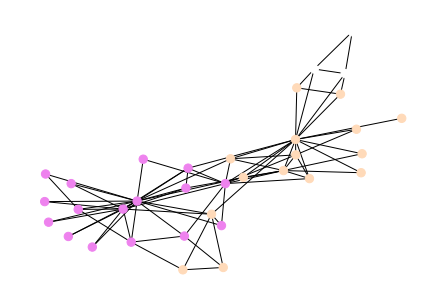

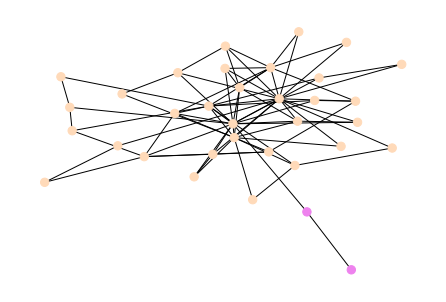

In [36]:
compare_communities(G_karate, G_karate_rnd)

##### dolphins

Number of communities by using greedy modularity maximization before randomisation: 4
Number of communities by using greedy modularity maximization after randomisation: 6
Number of communities by using label propagation algorithm before randomisation: 6
Number of communities by using label propagation algorithm after randomisation: 1


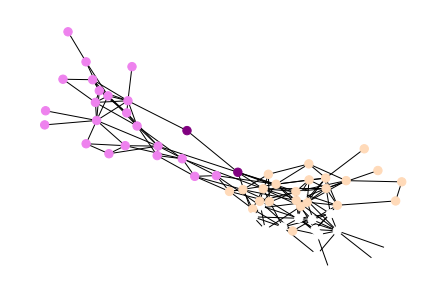

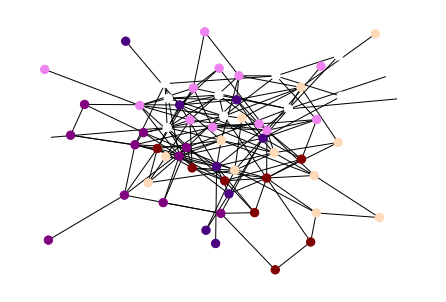

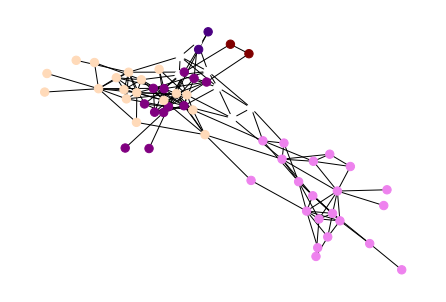

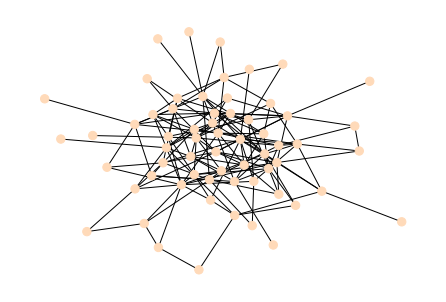

In [37]:
compare_communities(G_dolphins, G_dolphins_rnd)

##### Facebook

Number of communities by using greedy modularity maximization before randomisation: 13
Number of communities by using greedy modularity maximization after randomisation: 21
Number of communities by using label propagation algorithm before randomisation: 44
Number of communities by using label propagation algorithm after randomisation: 3


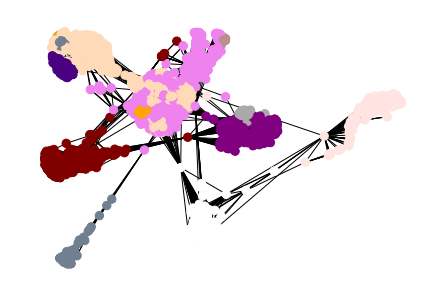

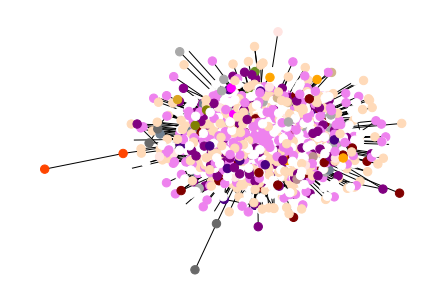

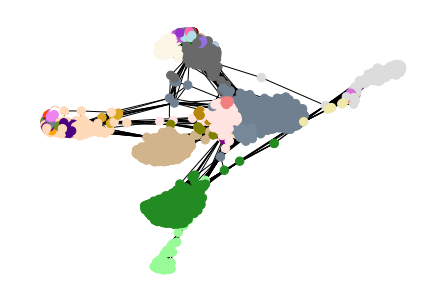

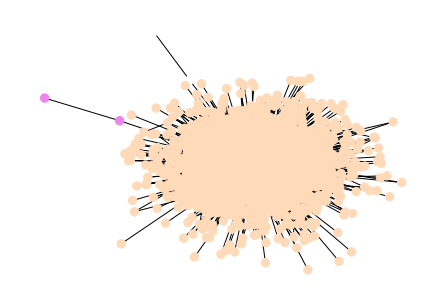

In [38]:
compare_communities(G_facebook, G_facebook_rnd)

#### A04.2 Task 1

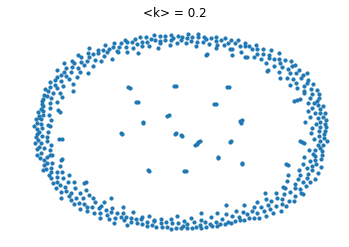

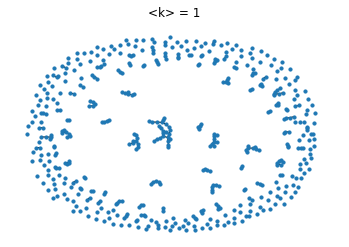

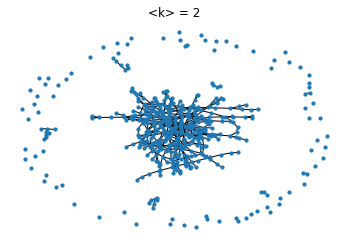

In [39]:
for avg_k in [0.2, 1 ,2]:
    new_fig()
    plt.title("<k> = " + str(avg_k))
    visualize_ER_graph(avg_k, 500)

#### A04.2_Task 2

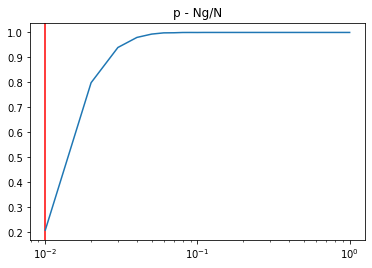

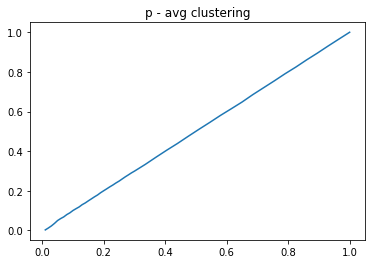

In [40]:
plot_p_NG_N(100)

#### A04.2 Task 2 - 2 Explanation

#### A04.3

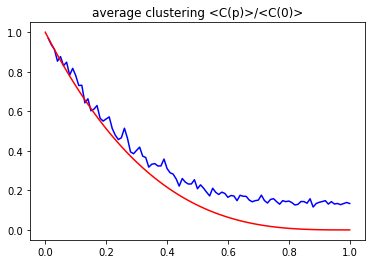

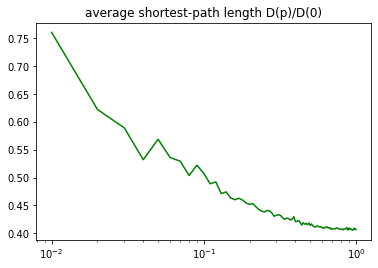

In [44]:
generate_ws()